In [1]:
cur_date = '091125'

library(tidyverse)
library(stringr)
library(reshape2)

# reading in files
heatmap_data <-read_csv("Input/Heatmap.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Rows: 22 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Title, Citation, Location
dbl (10): Study_ID, Impacted_by_Soil, Impacted_by_Vegetation, Impacted_by_As...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet th

In [2]:
head(heatmap_data)

Study_ID,Title,Citation,Location,Impacted_by_Soil,Impacted_by_Vegetation,Impacted_by_Ash,Impacted_by_Smoke,Impacted_by_Built_Environment,Impacted_by_Land_Use,Pre_Wildfire_Arsenic_Concentration,Impacts_Surface_Water,Impacts_Groundwater
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"(Murphy et al., 2020)",Colorado,1,0,1,0,0,1,1,1,0
2,Feeding inhibition following in-situ and laboratory exposure as an indicator of ecotoxic impacts of wildfires in affected waterbodies,"(Ré et al., 2020)",Portugal,1,0,1,0,0,0,0,1,0
3,"Paleolimnological Assessment of Wildfire-Derived Atmospheric Deposition of Trace Metal(loid)s and Major Ions to Subarctic Lakes (Northwest Territories, Canada)","(Pelletier et al., 2020)",Canada,0,0,1,0,0,0,1,1,0
4,Assessment of superficial water quality of small catchment basins affected by Portuguese rural fires of 2017,"(Sequeira et al., 2020)",Portugal,1,0,1,0,0,0,1,1,0
5,"Trace elements in stormflow, ash, and burned soil following the 2009 Station Fire in southern California","(Burton et al., 2016)",California,1,0,1,0,0,0,1,1,0
6,The Rural Fires of 2017 and Their Influences on Water Quality: An Assessment of Causes and Effects,"(Sequeira et al., 2023)",Portugal,1,1,0,0,0,0,0,1,0


Words about what the heatmap is showing.

In [3]:
heatmap_df <- heatmap_data %>%
    unite("location_citation", c("Location", "Citation"), sep = "-") %>%
    #select( -Title, - Citation, -Location) %>%
    pivot_longer(cols = 4:12, names_to = "Variable", values_to = "Present") %>%
    # cleaning up variable names
    mutate(Variable = str_replace_all(Variable, "_", " "),
          Variable = str_replace_all(Variable, "Impacts", "Impacted")) %>%
    mutate(Present = ifelse(Present == 1, "Yes", "No"))

head(heatmap_df)

Study_ID,Title,location_citation,Variable,Present
<dbl>,<chr>,<chr>,<chr>,<chr>
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"Colorado-(Murphy et al., 2020)",Impacted by Soil,Yes
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"Colorado-(Murphy et al., 2020)",Impacted by Vegetation,No
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"Colorado-(Murphy et al., 2020)",Impacted by Ash,Yes
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"Colorado-(Murphy et al., 2020)",Impacted by Smoke,No
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"Colorado-(Murphy et al., 2020)",Impacted by Built Environment,No
1,Wildfire-driven changes in hydrology mobilize arsenic and metals from legacy mine waste,"Colorado-(Murphy et al., 2020)",Impacted by Land Use,Yes


In [4]:
# ordering the df based on avg media/ fuel types and study averages
ordered_var_df = heatmap_df %>%
    group_by(Variable) %>%
    mutate(Count = ifelse(Present == "Yes", 1, 0)) %>%
    summarize(Avg_Count = mean(Count)) %>%
    arrange(Avg_Count)

ordered_study_df = heatmap_df %>%
    group_by(location_citation) %>%
    mutate(Count = ifelse(Present == "Yes", 1, 0)) %>%
    summarize(Avg_Count = mean(Count)) %>%
    arrange(Avg_Count)

heatmap_df$Variable = factor(heatmap_df$Variable, levels = ordered_var_df$Variable)
heatmap_df$location_citation = factor(heatmap_df$location_citation, levels = ordered_study_df$location_citation)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


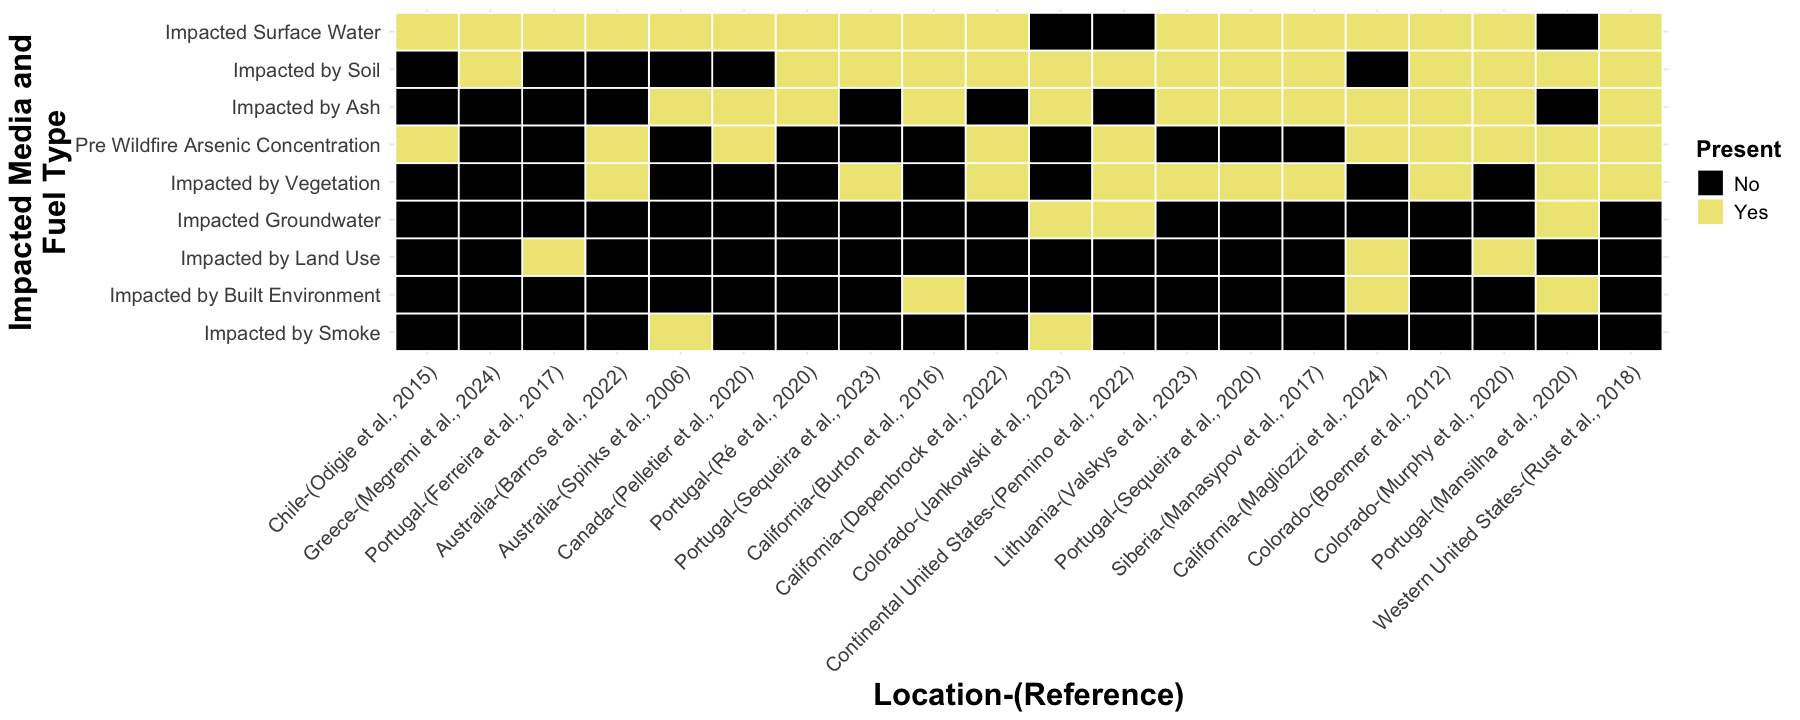

In [5]:
options(repr.plot.width=15, repr.plot.height=6) #changing size

ggplot(data = heatmap_df, aes(x= location_citation, y = Variable,
                              fill = Present)) +
  geom_tile(color = "white", size = 0.5) +

  theme_minimal() +
  theme(
    axis.title = element_text(face = "bold", size = rel(1.7)),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12), 
    legend.title = element_text(face = "bold", size = 14),
    legend.text = element_text(size = 12), #changes legend text
    legend.position = "right") + 

  labs(y = "Impacted Media and\nFuel Type", x = "Location-(Reference)") +

  scale_fill_manual(values = c("Yes" = "khaki2", "No" = "black")) 